In [2]:
import numpy as np
from numpy import random
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import os


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
text_color = 'black' 
rcParams['text.color'] = text_color 
rcParams['axes.labelcolor'] = text_color 
rcParams['xtick.color'] = text_color 
rcParams['ytick.color'] = text_color 
plt.rc('font', size=12)          # controls default text sizes 
plt.rc('axes', titlesize=20)     # fontsize of the axes title 
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels 
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels 
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels 
plt.rc('legend', fontsize=12)    # legend fontsize 
plt.rc('figure', titlesize=26)  # fontsize of the figure title

In [4]:
def compute_itd(angle, w_head):
    v_sound = 33000 #[cm/s]
    delta_x = (w_head*np.sin(np.deg2rad(angle)))
    itd = 1000*delta_x/v_sound #ms
    itd = np.round(itd,4) #only for spike_generators
    return itd

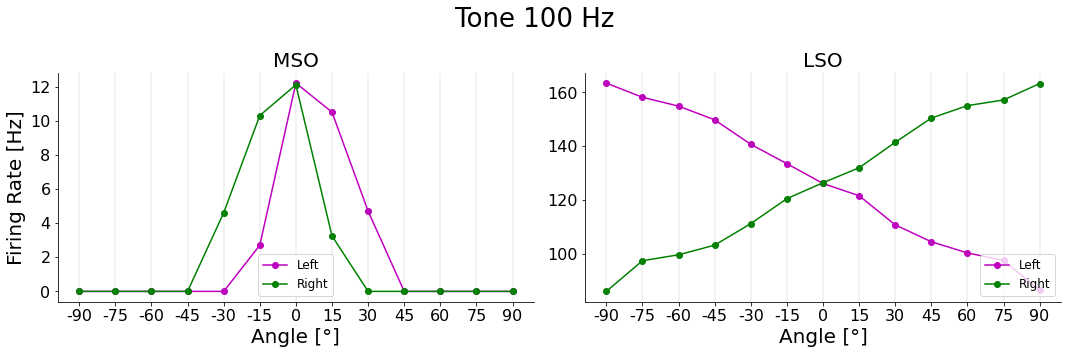

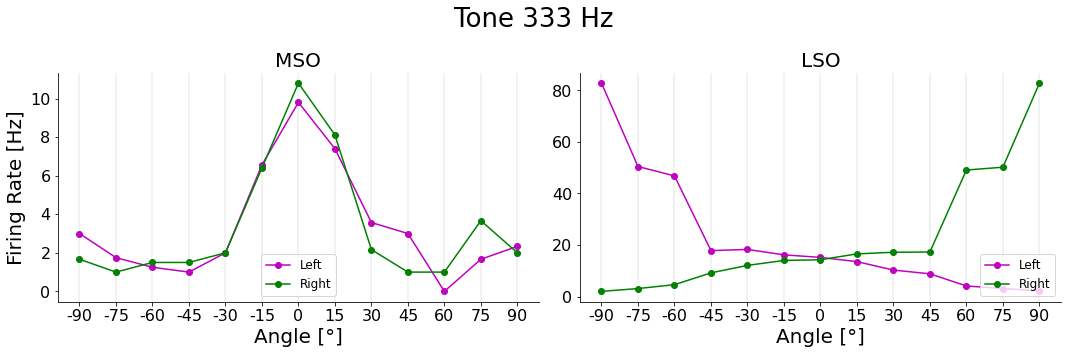

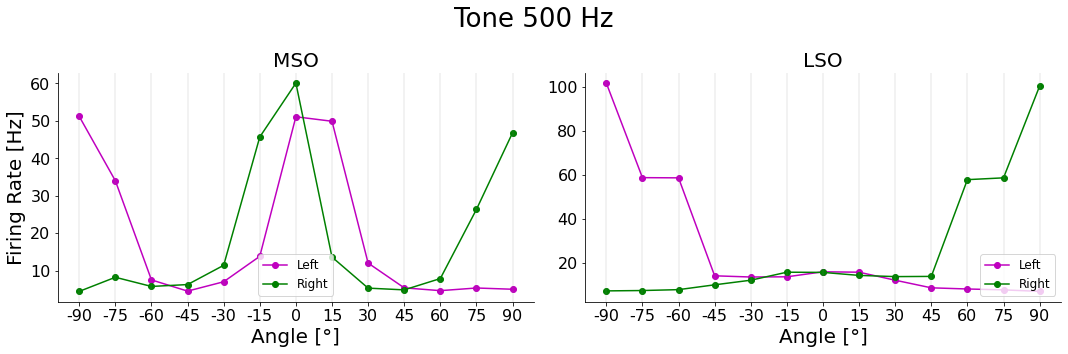

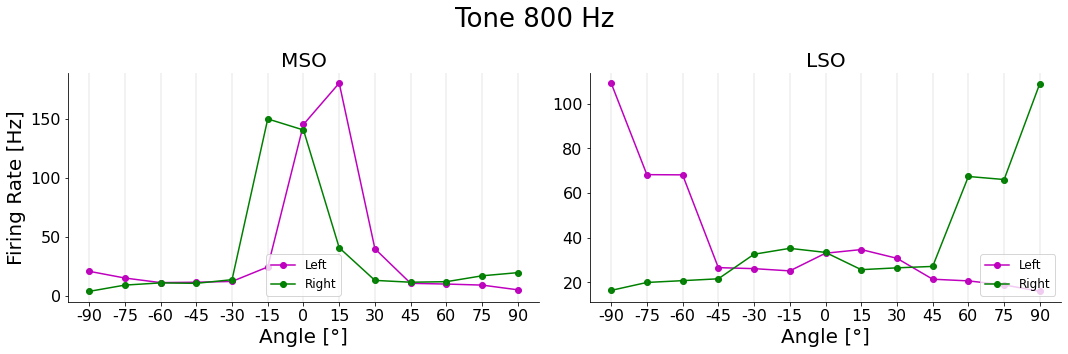

In [5]:
# Results Myoga zoom (w_head = 4)
angles = np.arange(-90,100,15)
w_head = 22
tones = [100,333,500,800]
delta_contra = -0.6
delta_ipsi = 0.1
tau = 0.5
angle_ax = 1
norm = 0

for tone in tones:
    
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    path_r = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_tau_exc_{}'.format(w_head,tone, delta_ipsi, delta_contra, tau)
    path_l = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_mso_results_tone_{}_delta_t_ipsi_{}_delta_t_contra_{}_tau_exc_{}'.format(w_head,tone, delta_ipsi, delta_contra, tau)
    path_r_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/r_lso_results_tone_{}'.format(w_head,tone)
    path_l_lso = '/home/ubuntu/solving_sound_loc/results/w_head = {}/l_lso_results_tone_{}'.format(w_head,tone)

    ax[0].set_title("MSO")
    ax[1].set_title("LSO")

    if(angle_ax):
        x = angles
        ax[0].set_xlabel("Angle [°]")
        ax[1].set_xlabel("Angle [°]")
        ax[0].set_xticks(angles)
        ax[0].set_xticklabels(angles)
        ax[1].set_xticks(angles)
        ax[1].set_xticklabels(angles)
    else:
        x = compute_itd(angles,w_head)
        ax[0].set_xlabel("ITDs [us]")
        ax[0].set_xticks(compute_itd(angles,4))
        ax[0].set_xticklabels(np.round(1000*compute_itd(angles,4),2))
        
    if(norm):
        y_r = np.loadtxt(path_r)[1]/np.max(np.loadtxt(path_r)[1])
        y_l  = np.loadtxt(path_l)[1]/np.max(np.loadtxt(path_l)[1])
        y_r0 = np.loadtxt(path_r)[0]/np.max(np.loadtxt(path_r)[0])
        y_l0  = np.loadtxt(path_l)[0]/np.max(np.loadtxt(path_l)[0])
        ax[0].set_ylabel("Normalized Firing Rate [Hz]")
    else:
        y_r = np.loadtxt(path_r)[1]
        y_l = np.loadtxt(path_l)[1]
        y_r0 = np.loadtxt(path_r)[0]
        y_l0 = np.loadtxt(path_l)[0]
        ax[0].set_ylabel("Firing Rate [Hz]")
    
    ax[0].plot(x,y_l,'mo-', label = "Left")
    ax[0].plot(x,y_r,'go-', label = "Right")
    ax[1].plot(x, np.loadtxt(path_l_lso), 'mo-', label = "Left")
    ax[1].plot(x, np.loadtxt(path_r_lso), 'go-', label = "Right")

    for i in range(len(angles)):
        ax[0].axvline(x[i], linewidth = 0.2, color = 'grey')
        ax[1].axvline(x[i], linewidth = 0.2, color = 'grey')

    ax[0].legend(loc = 'lower center')
    ax[0].spines['top'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    ax[1].legend(loc = 'lower right')
    ax[1].spines['top'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)

    fig.suptitle("Tone {} Hz".format(tone))
    fig.tight_layout()
